<a href="https://colab.research.google.com/github/alunfes/1m-btc-data/blob/master/LGBM_Trading_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip uninstall --yes lightgbm && pip install --install-option=--gpu lightgbm

Found existing installation: lightgbm 2.2.3
Uninstalling lightgbm-2.2.3:
  Successfully uninstalled lightgbm-2.2.3
/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 3.7 MB/s 
Skipping wheel build for lightgbm, due to binaries being disabled for it.
    Running setup.py install for lightgbm ... done


In [ ]:
'''
!sudo rm -rf /content/LightGBM
!git clone --recursive https://github.com/Microsoft/LightGBM
#!git clone --recursive https://github.com/microsoft/LightGBM/tree/v2.3.1
%cd /content/LightGBM/
!mkdir build
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)
!sudo apt-get -y install python-pip
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
%cd ./python-package
!sudo python setup.py install --precompile
'''

'\n!sudo rm -rf /content/LightGBM\n!git clone --recursive https://github.com/Microsoft/LightGBM\n#!git clone --recursive https://github.com/microsoft/LightGBM/tree/v2.3.1\n%cd /content/LightGBM/\n!mkdir build\n!cmake -DUSE_GPU=1 #avoid ..\n!make -j$(nproc)\n!sudo apt-get -y install python-pip\n!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U\n%cd ./python-package\n!sudo python setup.py install --precompile\n'

In [ ]:
#%cp -rp '/content/drive/My Drive/ta-lib/' ~/
%cd ~
!rm -rf ta-lib*
#!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!wget https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
#%cd '/content/drive/My Drive/ta-lib'
#%cd ta-lib
import os
#os.chdir('/content/drive/My Drive/ta-lib') # Can't use !cd in co-lab
os.chdir('ta-lib') # Can't use !cd in co-lab
#%cd ~/ta-lib
!./configure --prefix=/usr
#! '/content/drive/My Drive/ta-lib/configure' --prefix=/usr
!make
!make install
!pip install Ta-Lib
%cd /content

/root
--2022-07-27 23:53:56--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving sourceforge.net (sourceforge.net)... 104.18.34.243, 172.64.153.13
Connecting to sourceforge.net (sourceforge.net)|104.18.34.243|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/ [following]
--2022-07-27 23:53:56--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/download [following]
--2022-07-27 23:53:56--  https://sourceforge.net/projects/ta-lib/files/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz/download
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 302 Found
Locat

In [ ]:
!pip install optuna
!pip install joblib
!pip install six
!pip install bayesian-optimization
#!pip install stable-baselines3 --upgrade
#!pip install tensorboardcolab
#!pip --no-cache-dir install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
#!pip install lightgbm --install-option=--GPU
#!sudo pip --no-cache-dir install -I lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

import lightgbm as lgb
from sklearn import datasets
import dateutil
import copy
import sqlite3
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pickle
import csv
import matplotlib.pyplot as plt
from scipy.spatial.distance import correlation
import numpy as np
from numba import njit
from numba import prange
from numba.typed import List
import pandas as pd
#from multiprocessing import Pool, Value, Array
import multiprocessing as multi
from joblib import Parallel, delayed
import talib as ta
from datetime import datetime, timedelta, timezone
import sklearn.metrics
from sklearn.model_selection import train_test_split
from functools import partial
import optuna
import joblib
from joblib import Parallel, delayed
import time
import random
import collections

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class MarketData:
    @classmethod
    def initialize(cls, from_ratio:float, end_ratio:float):
        #cls.terms = [15, 25, 50, 100, 150, 300, 400, 800, 1000, 1440]
        cls.terms = [15, 25, 50, 100, 240]
        #cls.terms = [15, 100, 300, 1000]
        cls.df = pd.DataFrame()
        cls.tp = []
        cls.open = []
        cls.high = []
        cls.low = []
        cls.close = []
        cls.vol = []
        cls.ma = {}
        cls.ma_kairi = {}
        cls.rsi = {}
        cls.atr = {}
        cls.aroon_os = {}
        cls.cci = {}
        cls.dx = {}
        cls.macd = {}
        cls.macd_signal = {}
        cls.macd_hist = {}
        cls.rate_of_change = {}
        cls.williams_r = {}
        cls.correlation = {}
        cls.momentum_size = {}
        cls.stochastic = {}
        cls.__read_data()
        cls.__cut_data(from_ratio, end_ratio)
        cls.__calc_index()
        print('initialized MarketData')
    
    @classmethod
    def __read_data(cls):
        cls.df = pd.read_csv('/content/drive/My Drive/BTC-PERP-1mcp.csv')
        cls.tp = list(pd.read_csv('/content/drive/My Drive/tp_ptlc_0.025-0.005.csv')['tp'])
        #cls.tp = list(pd.read_csv('/content/drive/My Drive/tp_ptlc_0.05-0.005.csv')['tp'])
        cls.ts = list(cls.df['ts'])
        cls.open = list(cls.df['open'])
        cls.high = list(cls.df['high'])
        cls.low = list(cls.df['low'])
        cls.close = list(cls.df['close'])
        cls.vol = list(cls.df['volume'])
    
    @classmethod
    def __cut_data(cls, from_ratio:float, end_ratio:float):
        from_ind = int(len(cls.df) * from_ratio)
        end_ind = int(len(cls.df) * end_ratio)
        cls.df = cls.df.iloc[from_ind:end_ind]
        cls.tp = cls.tp[from_ind:end_ind]
        cls.ts = cls.ts[from_ind:end_ind]
        cls.open = cls.open[from_ind:end_ind]
        cls.high = cls.high[from_ind:end_ind]
        cls.low = cls.low[from_ind:end_ind]
        cls.close = cls.close[from_ind:end_ind]
        cls.vol = cls.vol[from_ind:end_ind]


    @classmethod
    def __calc_index(cls):
        for term in cls.terms:
            cls.ma[term] = cls.__calc_ma(term)
            cls.ma_kairi[term] = cls.__calc_ma_kairi(term)
            cls.rsi[term] = cls.__calc_rsi(term)
            cls.atr[term] = cls.__calc_atr(term)
            cls.aroon_os[term] = cls.__calc_aroon_os(term)
            cls.cci[term] = cls.__calc_cci(term)
            cls.dx[term] = cls.__calc_dx(term)
            cls.macd[term] = cls.__calc_macd(term)
            cls.macd_signal[term] = cls.__calc_macd_signal(term)
            cls.macd_hist[term] = cls.__calc_macd_hist(term)
            cls.rate_of_change[term] = cls.__calc_rate_of_change(term)
            cls.williams_r[term] = cls.__calc_williams_R(term)
            cls.correlation[term] = cls.__calc_correl(term)
            cls.momentum_size[term] = cls.__calc_momentum_size(term)
            cls.stochastic[term] = cls.__calc_stochastic(term)

    @classmethod
    def __calc_ma(cls, term):
        return list(ta.MA(np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_ma_kairi(cls, term):
        ma = cls.__calc_ma(term)
        return list(map(lambda c, e: (c - e) / e, np.array(cls.close, dtype='f8'), np.array(ma, dtype='f8')))
    
    @classmethod
    def __calc_rsi(cls, term):
        return ta.RSI(np.array(cls.close, dtype='f8'), timeperiod=term)
    
    @classmethod
    def __calc_atr(cls, term):
        return ta.ATR(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term)
    
    @classmethod
    def __calc_correl(cls, term):
        return list(ta.CORREL(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_williams_R(cls, term):
        return list(ta.WILLR(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'),timeperiod=term))
    
    @classmethod
    def __calc_rate_of_change(cls, term):
        return list(ta.ROC(np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_momentum_size(cls, term):
        return list(ta.MOM(np.array(cls.vol, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_macd(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'), np.array(signalperiod, dtype='i8'))
        return macd
    
    @classmethod
    def __calc_macd_signal(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return signal
    
    @classmethod
    def __calc_macd_hist(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist = ta.MACD(np.array(cls.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return hist
    
    @classmethod
    def __calc_aroon_os(cls, term):
        return list(ta.AROONOSC(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), timeperiod=term))

    @classmethod
    def __calc_cci(cls, term):
        return list(ta.CCI(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term))

    @classmethod
    def __calc_dx(cls, term):
        return list(ta.DX(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), timeperiod=term))
    
    @classmethod
    def __calc_stochastic(cls, term):
        k_term = term
        d_term = int(term / 2.0)
        fastk, fastd = ta.STOCHF(np.array(cls.high, dtype='f8'), np.array(cls.low, dtype='f8'), np.array(cls.close, dtype='f8'), fastk_period=k_term, fastd_period=d_term, fastd_matype=0)
        return list(np.array(fastk) / np.array(fastd))

In [ ]:
class Account:
    def __init__(self):
        self.asset = 100000
        self.fee = 0.00075
        self.slip_page = 1.0 #usd
        self.lot_size = 1.0
        self.initialize_holding_data()
        self.initialize_performance_data()


    def initialize_holding_data(self):
        self.holding_side= ''
        self.holding_price = 0.0
        self.holding_lot = 0.0
        self.holding_i = 0
    
    def initialize_performance_data(self):
        self.total_pl = 0.0
        self.total_pl_log = []
        self.total_asset_log = []
        self.holding_side_log = []
        self.i_log = []
        self.total_fee = 0.0
        self.realized_pl = 0.0
        self.unrealized_pl = 0.0
        self.num_trade = 0
        self.num_win = 0
        self.win_rate = 0.0
        self.change_vola = 0.0
        self.max_pl_ratio = 0.0
    
    def move_to_next(self, i):
        if self.holding_side != '':
            self.unrealized_pl = self.holding_lot * MarketData.close[i] * (MarketData.close[i] - self.holding_price if self.holding_side == 'buy' else self.holding_price - MarketData.close[i]) / self.holding_price
        else:
            self.unrealized_pl = 0.0
        self.total_pl = self.realized_pl + self.unrealized_pl - self.total_fee
        self.total_pl_log.append(self.total_pl)
        self.total_asset_log.append(self.total_pl + self.asset)
        self.holding_side_log.append(self.holding_side)
        self.i_log.append(i)
    
    def last_day(self,i):
        if self.holding_side != '':
            self.exit_process(MarketData.close[i], i)
        self.total_pl = self.realized_pl + self.unrealized_pl - self.total_fee
        self.total_pl_log.append(self.total_pl)
        self.total_asset_log.append(self.total_pl + self.asset)
        self.holding_side_log.append(self.holding_side)
        self.win_rate = self.num_win / self.num_trade if self.num_trade > 0 else 0
        self.max_pl_ratio = (max(self.total_asset_log) - self.total_asset_log[0]) / self.total_asset_log[0]
        self.i_log.append(i)
        self.calc_vola_change()


    def entry_order(self, i, side):
        if self.holding_side == '': #new entry
            self.holding_side = side
            self.holding_price = MarketData.close[i] + self.slip_page if side == 'buy' else MarketData.close[i] - self.slip_page
            self.holding_lot = self.lot_size * self.asset / MarketData.close[i]
            self.holding_i = i
            self.total_fee += self.fee * self.holding_lot * MarketData.close[i]
        elif self.holding_side == side:
            print('Additional entry is not allowed !')
        else:
            self.exit_process(MarketData.close[i], i)
            
    def exit_process(self, price, i):
        self.total_fee += self.fee * self.holding_lot * price
        pl = self.holding_lot * price * (price - self.holding_price if self.holding_side == 'buy' else self.holding_price - price) / self.holding_price
        self.num_trade +=1
        #print('exit process;', ', i=', i, ', pl=', pl, ', holding side=', self.holding_side, ', holding i=', self.holding_i)
        if pl > 0:
            self.num_win += 1
        self.realized_pl += pl
        self.initialize_holding_data()
    
    def calc_vola_change(self):
        vola = 0
        change_ratio = []
        for i in range(len(self.total_asset_log) - 1):
            change_ratio.append((self.total_asset_log[i+1] - self.total_asset_log[i]) / self.total_asset_log[i])
        ave = sum(change_ratio) / len(change_ratio)
        for c in change_ratio:
            vola += pow((c - ave), 2)
        self.change_vola = pow(vola / len(change_ratio), 0.5)

In [ ]:
class Strategy:
    @classmethod
    def lgbm_tp_simple(cls, i, pred_ind:int, ac:Account, pred, pt, lc):
        side = []
        pred_side = {0:'none', 1:'buy', 2:'sell'}[pred[pred_ind]]
        if ac.holding_side =='' and pred_side != 'none': #new entry
            side.append(pred_side)
        else:
            ptlc = cls.__check_pt_lc(i, ac, pt, lc)
            if ptlc != 'none':
                side.append('buy' if ac.holding_side == 'sell' else 'sell')
        return side
    
    @classmethod
    def lgbm_tp_quick_change(cls, i, pred_ind:int, ac:Account, pred, num_opposite_pred_for_change, pt, lc):
        side = []
        pred_side = {0:'none', 1:'buy', 2:'sell'}[pred[pred_ind]]
        if ac.holding_side =='' and pred_side != 'none': #new entry
            side.append(pred_side)
        else:
            ptlc = cls.__check_pt_lc(i, ac, pt, lc)
            if ptlc != 'none':
                side.append('buy' if ac.holding_side == 'sell' else 'sell')
            else:
                if pred_side != 'none' and ac.holding_side != pred_side: #check for quick change
                    if pred_side == 'buy':
                        if sum(pred[pred_ind - num_opposite_pred_for_change:pred_ind+1]) == num_opposite_pred_for_change:
                            side.append('buy') #exist and opposite entry
                            side.append('buy')
                    else:
                        if sum(pred[pred_ind - num_opposite_pred_for_change:pred_ind+1]) == (2 * num_opposite_pred_for_change):
                            side.append('sell') #exist and opposite entry
                            side.append('sell')
        return side

    @classmethod
    def lgbm_tp_quick_change2(cls, i, pred_ind:int, ac:Account, pred, num_quick, opposite_ratio, pt, lc):
        side = []
        pred_side = {0:'none', 1:'buy', 2:'sell'}[pred[pred_ind]]
        if ac.holding_side =='' and pred_side != 'none': #new entry
            side.append(pred_side)
        else:
            ptlc = cls.__check_pt_lc(i, ac, pt, lc)
            if ptlc != 'none':
                side.append('buy' if ac.holding_side == 'sell' else 'sell')
            else:
                if pred_side != 'none' and ac.holding_side != pred_side: #check for quick change
                    if pred_side == 'buy':
                        if pred[pred_ind - num_quick:pred_ind+1].count(1) >= int(opposite_ratio * num_quick):
                            side.append('buy') #exist and opposite entry
                            side.append('buy')
                    else:
                        if pred[pred_ind - num_quick:pred_ind+1].count(2) >= int(opposite_ratio * num_quick):
                            side.append('sell') #exist and opposite entry
                            side.append('sell')
        return side
    
    @classmethod
    def marketdata_tp_simple(cls, i, ac:Account, pt, lc):
        side = []
        pred_side = {0:'none', 1:'buy', 2:'sell'}[MarketData.tp[i]]
        if ac.holding_side =='' and pred_side != 'none': #new entry
            side.append(pred_side)
        else:
            ptlc = cls.__check_pt_lc(i, ac, pt, lc)
            if ptlc != 'none':
                side.append('buy' if ac.holding_side == 'sell' else 'sell')
        return side
        

    @classmethod
    def __check_pt_lc(cls, i, ac:Account, pt, lc):
        if ac.holding_side !='':
            pl = (MarketData.close[i] - ac.holding_price) / ac.holding_price if ac.holding_side == 'buy' else (ac.holding_price - MarketData.close[i]) / ac.holding_price
            if pl >= pt:
                #print('pt:', ', close=', MarketData.close[i], ', holding price=', ac.holding_price, 'holding i=', ac.holding_i, ', i=', i)
                return 'pt'
            elif pl <= lc:
                #print('lc:', ', close=', MarketData.close[i], ', holding price=', ac.holding_price, 'holding i=', ac.holding_i, ', i=', i)
                return 'lc'
            else:
                return 'none'
        else:
            return 'none'

In [ ]:
class Sim:
    def lgbm_simple(self, from_ind, pred, pt, lc):
        ac = Account()
        num_loop = len(pred)
        i = 0
        pred_ind = 0
        for n in range(num_loop -1):
            i = n + from_ind
            sides = Strategy.lgbm_tp_simple(i, pred_ind, ac, pred, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
            pred_ind += 1
        ac.last_day(from_ind + num_loop)
        return ac
    
    def lgbm_quick_change(self, from_ind, pred, num_opposite_pred_for_change, pt, lc):
        ac = Account()
        num_loop = len(pred)
        i = 0
        pred_ind = 0
        for n in range(num_loop -1):
            i = n + from_ind
            sides = Strategy.lgbm_tp_quick_change(i, pred_ind, ac, pred, num_opposite_pred_for_change, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
            pred_ind += 1
        ac.last_day(from_ind + num_loop)
        return ac
    
    def lgbm_quick_change2(self, from_ind, pred, num_quick, opposite_ratio, pt, lc):
        ac = Account()
        num_loop = len(pred)
        i = 0
        pred_ind = 0
        for n in range(num_loop -1):
            i = n + from_ind
            sides = Strategy.lgbm_tp_quick_change2(i, pred_ind, ac, pred, num_quick, opposite_ratio, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
            pred_ind += 1
        ac.last_day(from_ind + num_loop)
        return ac
    
    def marketdata_tp_simple(self, from_ind, end_ind, pt, lc):
        ac = Account()
        i = 0
        num_loop = end_ind - from_ind
        for n in range(num_loop -1):
            i = n + from_ind
            sides = Strategy.marketdata_tp_simple(i, ac, pt, lc)
            for side in sides:
                ac.entry_order(i, side)
            ac.move_to_next(i)
        ac.last_day(from_ind + num_loop)
        return ac

In [ ]:
class LGBMDataGenerator:
    def generate_lgbm_data(self, tuning_point:bool):
        lgbm_data = pd.DataFrame()
        lgbm_data = self.__generate_marketdata_index_df('ma_kairi', MarketData.ma_kairi)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('rsi', MarketData.rsi)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('atr', MarketData.atr)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('cci', MarketData.cci)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('dx', MarketData.dx)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macd', MarketData.macd)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macd_signal', MarketData.macd_signal)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('macd_hist', MarketData.macd_hist)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('rate_of_change', MarketData.rate_of_change)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('williams_r', MarketData.williams_r)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('correlation', MarketData.correlation)], axis=1)
        lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('stochastic', MarketData.stochastic)], axis=1)
        #lgbm_data = pd.concat([lgbm_data, self.__generate_marketdata_index_df('momentum_size', MarketData.momentum_size)], axis=1)
        if tuning_point:
            tp = self.__detect_turning_point(60, 0.025, list(MarketData.tp)[:])
            lgbm_data = pd.concat([lgbm_data, self.__generate_tp(tp)], axis=1)
        else:
            lgbm_data = pd.concat([lgbm_data, self.__generate_tp(list(MarketData.tp)[:])], axis=1)
        return lgbm_data

    def convert_lgbm_train_test_data(self, df:pd.DataFrame, train_ratio:float):
        df = df.iloc[2000:]
        df = df.iloc[:len(df) - 2000]
        train, test = train_test_split(df, train_size = train_ratio, test_size = 1.0 - train_ratio, shuffle=False)
        train, valid = train_test_split(train, train_size = 0.9, test_size = 0.1, shuffle=True)
        train_x = train.drop('tp', axis =1)
        train_y = train['tp']
        valid_x = valid.drop('tp', axis =1)
        valid_y = valid['tp']
        test_x = test.drop('tp', axis=1)
        test_y = test['tp']
        return train_x, train_y, valid_x, valid_y, test_x, test_y

    
    def sampling_train_data(self, train_df, none_sampling_ratio, buysell_sampling_ratio):
        main_df = pd.DataFrame()
        zero_df = train_df.query('tp == 0')
        one_df = train_df.query('tp == 1')
        two_df = train_df.query('tp == 2')
        zero_df = self.sampling(zero_df, none_sampling_ratio)
        main_df = pd.concat([main_df, zero_df])
        one_df = self.sampling(one_df, buysell_sampling_ratio)
        main_df = pd.concat([main_df, one_df])
        two_df = self.sampling(two_df, buysell_sampling_ratio)
        main_df = pd.concat([main_df, two_df])
        return main_df
    
    def sampling(self, df, sampling_ratio):
        res = []
        sampling_window = round(len(df) / (len(df) * sampling_ratio))
        i = 0
        while True:
            res.append(df.iloc[i])
            i += sampling_window
            if i >= len(df):
                break
        return pd.DataFrame(res)


    def __generate_marketdata_index_df(self, index_name, market_data_index):
        res = {}
        for term in MarketData.terms:
            res[index_name+'_'+str(term)] = market_data_index[term]
        return pd.DataFrame(res)

    def __generate_tp(self, tp):
        tp_df = {}
        tp_df['tp'] = tp
        return pd.DataFrame(tp_df)

    def __detect_turning_point(self, window:int, before_change_ratio:float, tp:list):
        tuning_points = []
        for i in range(window):
            tuning_points.append(0)
        for i in range(window, len(MarketData.close)):
            if tp[i] == 1:
                if (MarketData.close[i] - max(MarketData.close[i-window+1:i+1])) / MarketData.close[i] <= -before_change_ratio:
                    tuning_points.append(1)
                else:
                    tuning_points.append(0)
            elif tp[i] == 2:
                if (MarketData.close[i] - min(MarketData.close[i-window+1:i+1])) / MarketData.close[i] >= before_change_ratio:
                    tuning_points.append(2)
                else:
                    tuning_points.append(0)
            else:
                tuning_points.append(0)
        return tuning_points

    def tp_detect_normal_process(self, buy_sell, entry_price, from_ind, pt, lc):
        log_from_ind = from_ind
        while True:
            if buy_sell == 'buy':
                if MarketData.close[from_ind] > entry_price * (1.0 + pt):
                    return {'ptlc':'pt', 'i':from_ind}
                elif MarketData.close[i] <= entry_price * (1.0 -lc):
                    return {'ptlc':'lc', 'i':from_ind}
            else:
                if MarketData.close[from_ind] < entry_price * (1.0 - pt):
                    return {'ptlc':'pt', 'i':from_ind}
                elif MarketData.close[i] >= entry_price * (1.0 + lc):
                    return {'ptlc':'lc', 'i':from_ind}
            from_ind += 1
            if from_ind >= len(MarketData.close):
                return {'ptlc':'n/a', 'i':from_ind}


    def tp_detection_enhanced_process(self, buy_sell, ref_entry_price, ref_pt_lc, entry_price):
        if buy_sell == 'buy':
            if ref_pt_lc == 'pt':
                if ref_entry_price >= entry_price:
                    return 'pt'
                else:
                    return 'n/a'
            else:
                if ref_entry_price <= entry_price:
                    return 'lc'
                else:
                    return 'n/a'
        else:
            if ref_pt_lc == 'pt':
                if ref_entry_price <= entry_price:
                    return 'pt'
                else:
                    return 'n/a'
            else:
                if ref_entry_price >= entry_price:
                    return 'lc'
                else:
                    return 'n/a'


    def generate_ptlc_point_data(self, pt, lc):
        #generate ptlc point data
        buy_sell_ptlc_points = [] #0:no, 1:buy, 2:sell
        for i in range(len(MarketData.close)):
            buy_check = self.__check_pt_lc(i, 'buy', pt, lc)
            sell_check = self.__check_pt_lc(i, 'sell', pt, lc)
            if buy_check > 0 and sell_check < 0: #only buy hit
                buy_sell_ptlc_points.append(1)
            elif buy_check < 0 and sell_check > 0: #only sell hit
                buy_sell_ptlc_points.append(2)
            elif buy_check > 0 and sell_check > 0: #both buy & sell hit
                if buy_check < sell_check: #buy hit comes first
                    buy_sell_ptlc_points.append(1)
                else:
                    buy_sell_ptlc_points.append(2)
            else:
                buy_sell_ptlc_points.append(0)
        return buy_sell_ptlc_points


    def __check_pt_lc(self, i:int, buy_or_sell:str, pt:float, lc:float):        
        entry_price = MarketData.close[i]
        while True:
            if buy_or_sell == 'buy':
                if MarketData.close[i] > entry_price * (1.0 + pt):
                    return i
                elif MarketData.close[i] <= entry_price * (1.0 - lc):
                    return -1
            elif buy_or_sell == 'sell':
                if MarketData.close[i] < entry_price * (1.0 - pt):
                    return i
                elif MarketData.close[i] >= entry_price * (1.0 + lc):
                    return -1
            i += 1
            if i >= len(MarketData.close):
                break
        return -1


In [ ]:
MarketData.initialize(0.0,1.0)
ldg = LGBMDataGenerator()
lgbm_df = ldg.generate_lgbm_data()
train_x, train_y, valid_x, valid_y, test_x, test_y = ldg.convert_lgbm_train_test_data(lgbm_df, 0.8)

initialized MarketData


In [ ]:
class LGBM:
    def load_model(self):
        with open('/content/drive/My Drive/Model/lgbm_tp_model.dat', mode='rb') as f:
            self.model = pickle.load(f)
    
    def save_model(self, model):
        file = '/content/drive/My Drive/Model/lgbm_tp_model.dat'
        pickle.dump(model, open(file, 'wb'))

    def train(self, train_x, train_y, valid_x, valid_y, params):
        print('training data description')
        print('train_x:', train_x.shape)
        print('train_y:', train_y.shape)
        start_time = time.time()
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        valid = lgb.Dataset(valid_x.values.astype(np.float32), valid_y.values.astype(np.float32))
        lgbm_params = params
        model = lgb.train(
            lgbm_params, 
            train,
            valid_sets=[valid],
            verbose_eval=False,
            callbacks=[lgb.early_stopping(stopping_rounds=10, 
                                verbose=False),
                           #lgb.log_evaluation(0)
                           ]
            )
        print('train elapsed time=', time.time() - start_time)
        return model
    
    def prediction(self, model, test_x, test_y):
        prediction = []
        pval = model.predict(test_x.values.astype(np.float32), num_iteration=model.best_iteration)
        for p in pval:
            prediction.append(np.argmax(p))
        acc = self.check_matched_rate(prediction, test_y)
        return prediction, acc
    
    def check_matched_rate(self, pred, test_y):
        print('modelがbuy / sellを予測したときにそれが正しい確率')
        num_match = 0
        target = 0
        for i in range(len(pred)):
            if pred[i] != 0:
                target += 1
                if pred[i] == test_y.iloc[i]:
                    num_match += 1
        if target > 0:
            print('match rate=', num_match / target)
            return (num_match, target)
        else:
            print('match rate=', 0)
            return (num_match, target)



lgbm = LGBM()
params = {
            'objective' : 'multiclass',
            'num_class': 3,
            'boosting': 'gbdt',
            'tree_learner': 'data',
            'learning_rate':0.05,
            'num_iterations':1000,
            'lambda_l1':1.0,
            'lambda_l2':1.0,
            'extra_trees': True,
            #'device_type':'gpu',
            #'num_leaves':18,
            #'gpu_use_dp':True,
            'verbosity':-1,
        }



In [ ]:
train_x, train_y, valid_x, valid_y, test_x, test_y = ldg.convert_lgbm_train_test_data(lgbm_df.iloc[:100000], 0.8)

model = lgbm.train(train_x, pd.to_numeric(train_y), valid_x, pd.to_numeric(valid_y), params)
lgbm.save_model(model)
pred, acc = lgbm.prediction(model, test_x, pd.to_numeric(test_y))
print('target=', acc[1], ', num match=', acc[0])
plt.plot(pred)
importance = pd.DataFrame(model.feature_importance(), index = test_x.columns, columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)
#lgb.plot_metric(model)

In [ ]:
acc

(189, 1937)

total pl= -998.0871600389102 , num trade= 13 , win rate= 0.23076923076923078 , total asset vola= 0.06340125939340983 , max pl ratio= 0.013439717986909235


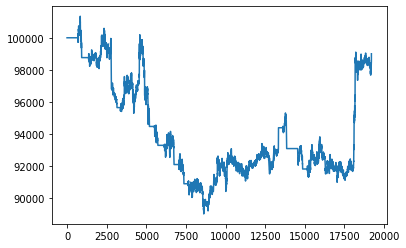

In [ ]:
sim = Sim()
ac = Account()
ac = sim.lgbm_simple(test_x.index[0], pred, 0.05, -0.01)
print('total pl=', ac.total_pl, ', num trade=', ac.num_trade, ', win rate=', ac.win_rate, ', total asset vola=', ac.change_vola * 100, ', max pl ratio=', ac.max_pl_ratio)
plt.plot(ac.total_asset_log)

In [ ]:
def optPTLC(test_x_opt, pred_opt, num_quick_change):
    #lc_list = [-0.005, -0.007, -0.01, -0.015, -0.02]
    lc_list = [-0.005, -0.007, -0.009, -0.011, -0.013, -0.015, -0.017, -0.02, -0.03, -0.04, -0.05, -0.07]
    #pt_list = [0.03, 0.05, 0.07, 0.09, 0.12, 0.15, 0.2]
    pt_list = [0.01, 0.025, 0.035, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.2, 0.22, 0.25, 0.27, 0.3]
    pt_log = []
    lc_log = []
    pl = []
    num_trade = []
    win_rate = []
    vola = []
    max_pl = []
    i=0
    for lc in lc_list:
        for pt in pt_list:
            sim = Sim()
            ac = Account()
            if num_quick_change ==0:
                ac = sim.lgbm_simple(test_x_opt.index[0], pred_opt, pt, lc)
            else:
                ac = sim.lgbm_quick_change(test_x_opt.index[0], pred_opt, num_quick_change, pt, lc)
            pt_log.append(pt)
            lc_log.append(lc)
            pl.append(ac.total_pl)
            num_trade.append(ac.num_trade)
            win_rate.append(ac.win_rate)
            vola.append(ac.change_vola * 100)
            max_pl.append(ac.max_pl_ratio)
            i += 1
    hyou = {'pt':pt_log, 'lc':lc_log, 'total pl':pl, 'num_trade':num_trade, 'win_rate':win_rate, 'vola':vola, 'max_pl':max_pl}
    opt_df = pd.DataFrame(hyou)
    tp_list = list(opt_df['total pl'])
    opt_index = tp_list.index(max(tp_list))
    opt_pt = opt_df['pt'].iloc[opt_index]
    opt_lc = opt_df['lc'].iloc[opt_index]
    return opt_pt, opt_lc


#df = optPTLC(test_x, pred)
#df

In [ ]:
def optQuickChange(test_x_opt, pred_opt, pt, lc):
    num_quick = [5, 10, 15, 20, 25, 30, 40, 50, 60]
    opposite_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    nq_log = []
    opr_log = []
    pl = []
    num_trade = []
    win_rate = []
    vola = []
    max_pl = []
    i=0
    for nq in num_quick:
        for opr in opposite_ratio:
            sim = Sim()
            ac = Account()
            ac = sim.lgbm_quick_change2(test_x_opt.index[0], pred_opt, nq, opr, pt, lc)
            nq_log.append(nq)
            opr_log.append(opr)
            pl.append(ac.total_pl)
            num_trade.append(ac.num_trade)
            win_rate.append(ac.win_rate)
            vola.append(ac.change_vola * 100)
            max_pl.append(ac.max_pl_ratio)
            i += 1
    hyou = {'num_quick':nq_log, 'opposite_ratio':opr_log, 'total pl':pl, 'num_trade':num_trade, 'win_rate':win_rate, 'vola':vola, 'max_pl':max_pl}
    opt_df = pd.DataFrame(hyou)
    tp_list = list(opt_df['total pl'])
    opt_index = tp_list.index(max(tp_list))
    opt_num_quick = opt_df['num_quick'].iloc[opt_index]
    opt_opposite_ratio = opt_df['opposite_ratio'].iloc[opt_index]
    return opt_num_quick, opt_opposite_ratio


#df = optPTLC(test_x, pred)
#df

In [ ]:
class VariousPeriodTest:
    def testVariousPeriods(self):
        start_time = time.time()
        MarketData.initialize(0.0,1.0)
        tuning_point = False
        train_period = 120000
        opt_period = 20000
        test_period = 40000
        window = 120000
        start_ind = 10000
        num_quick_change = 0
        ldg = LGBMDataGenerator()
        lgbm_df = ldg.generate_lgbm_data(tuning_point)
        param = {
                'objective' : 'multiclass',
                'num_class': 3,
                'boosting': 'gbdt',
                'tree_learner': 'data',
                'learning_rate':0.05,
                'num_iterations':30000,
                'lambda_l1':1.0,
                'lambda_l2':1.0,
                'extra_trees': True,
                #'device_type':'gpu',
                #'num_leaves':18,
                #'gpu_use_dp':True,
                'verbosity':-1,
                'verbose_eval':False,
            }
        
        num_test = 0
        self.initialize_log()
        while start_ind +train_period + opt_period + test_period < len(lgbm_df):
            ldg = LGBMDataGenerator()
            lgbm = LGBM()
            opt_lgbm_df = lgbm_df.iloc[start_ind : start_ind + train_period + opt_period]
            train_ratio = round(train_period / (train_period + opt_period), 4) - 0.01
            train_x, train_y, valid_x, valid_y, opt_x, opt_y = ldg.convert_lgbm_train_test_data(opt_lgbm_df, train_ratio)
            model = lgbm.train(train_x, pd.to_numeric(train_y), valid_x, pd.to_numeric(valid_y), param)
            opt_pred, opt_acc = lgbm.prediction(model, opt_x, pd.to_numeric(opt_y))
            opt_pt, opt_lc = optPTLC(opt_x, opt_pred, num_quick_change)
            #opt_num_quick, opt_opposite_ratio = optQuickChange(opt_x, opt_pred, opt_pt, opt_lc)
            test_lgbm_df = lgbm_df.iloc[start_ind + train_period + opt_period: start_ind + train_period + opt_period + test_period]
            train_ratio = 0.01
            train_x, train_y, valid_x, valid_y, test_x, test_y = ldg.convert_lgbm_train_test_data(test_lgbm_df, train_ratio)
            pred, acc = lgbm.prediction(model, test_x, pd.to_numeric(test_y))
            sim = Sim()
            ac_normal = Account()
            ac_opt = Account()
            ac_normal = sim.lgbm_simple(test_x.index[0], pred, 0.025, -0.005)
            ac_opt = sim.lgbm_simple(test_x.index[0], pred, opt_pt, opt_lc)
            #ac_opt = sim.lgbm_quick_change2(test_x.index[0], pred, opt_num_quick, opt_opposite_ratio, opt_pt, opt_lc)
            '''
            if num_quick_change == 0:
                ac_normal = sim.lgbm_simple(test_x.index[0], pred, 0.05, -0.01)
                ac_opt = sim.lgbm_simple(test_x.index[0], pred, opt_pt, opt_lc)
            else:
                ac_normal = sim.lgbm_quick_change(test_x.index[0], pred, num_quick_change, 0.05, -0.01)
                ac_opt = sim.lgbm_quick_change(test_x.index[0], pred, num_quick_change, opt_pt, opt_lc)
            '''
            print('#',num_test, ', total pl=', ac_opt.total_pl, ', num trade=', ac_opt.num_trade, ', win rate=', ac_opt.win_rate, ', total asset vola=', ac_opt.change_vola * 100, ', max pl ratio=', ac_opt.max_pl_ratio)
            self.take_log(start_ind, train_period, opt_period, test_period, 0, opt_pt, opt_lc, ac_opt.total_pl, ac_opt.num_trade, ac_opt.win_rate, ac_opt.max_pl_ratio, ac_opt.change_vola, 
                            opt_acc[0] / opt_acc[1] if opt_acc[1] > 0 else 0 , ac_normal.total_pl, ac_normal.num_trade, ac_normal.win_rate, ac_normal.max_pl_ratio, ac_normal.change_vola, 
                            acc[0]/acc[1] if acc[1] > 0 else 0, acc[1], acc[0])
            self.save_log()
            num_test += 1
            start_ind = start_ind + window
        print('time elapsed=', time.time() - start_time)
        return pd.DataFrame(self.get_log())


    def initialize_log(self):
        self.start_ind_log = []
        self.train_period_log = []
        self.opt_period = []
        self.test_period_log = []
        self.train_start = []
        self.train_end = []
        self.opt_start = []
        self.opt_end = []
        self.test_start = []
        self.test_end = []
        self.opt_pt_log = []
        self.opt_lc_log = []
        self.params_log = []
        self.opt_total_pl_log = []
        self.opt_num_log = []
        self.opt_win_rate_log = []
        self.opt_max_pl_log = []
        self.opt_vola_log = []
        self.opt_match_rate = []
        self.base_total_pl_log = []
        self.base_num_log = []
        self.base_win_rate_log = []
        self.base_max_pl_log = []
        self.base_vola_log = []
        self.acc_log = []
        self.match_rate_log = []
        self.target_log = []
        self.match_log = []
        self.log_dict = {}


    def take_log(self, start_ind, train_period, opt_period, test_period, param, opt_pt, opt_lc, opt_total_pl, opt_num, opt_winr, opt_maxpl, opt_vola, opt_match_rate, base_total_pl, base_num, base_winr, base_maxpl, base_vola, match_rate, target, match):
        self.start_ind_log.append(start_ind)
        self.train_period_log.append(train_period)
        self.opt_period.append(opt_period)
        self.test_period_log.append(test_period)
        self.train_start.append(start_ind)
        self.train_end.append(start_ind + train_period)
        self.opt_start.append(start_ind + train_period)
        self.opt_end.append(start_ind + train_period + opt_period)
        self.test_start.append(start_ind + train_period+opt_period)
        self.test_end.append(start_ind + train_period+opt_period+test_period)
        self.params_log.append(param)
        self.opt_pt_log.append(opt_pt)
        self.opt_lc_log.append(opt_lc)
        self.opt_total_pl_log.append(opt_total_pl)
        self.opt_num_log.append(opt_num)
        self.opt_win_rate_log.append(opt_winr)
        self.opt_max_pl_log.append(opt_maxpl)
        self.opt_vola_log.append(opt_vola)
        self.opt_match_rate.append(opt_match_rate)
        self.base_total_pl_log.append(base_total_pl)
        self.base_num_log.append(base_num)
        self.base_win_rate_log.append(base_winr)
        self.base_max_pl_log.append(base_maxpl)
        self.base_vola_log.append(base_vola)
        self.match_rate_log.append(match_rate)
        self.target_log.append(target)
        self.match_log.append(match)
        self.log_dict = {'train_period':self.train_period_log, 'test_period':self.test_period_log, 'train_start':self.train_start, 'train_end':self.train_end, 'opt_start':self.opt_start,
                         'opt_end':self.opt_end, 'test_start':self.test_start, 'test_end':self.test_end, 'params':self.params_log, 'opt_pt':self.opt_pt_log, 'opt_lc':self.opt_lc_log, 'opt_total_pl':self.opt_total_pl_log,
                    'opt_num':self.opt_num_log, 'opt_winr':self.opt_win_rate_log, 'opt_maxpl':self.opt_max_pl_log, 'opt_vola':self.opt_vola_log, 'opt_match_rate':self.opt_match_rate, 'base_total_pl':self.base_total_pl_log,
                    'base_num':self.base_num_log, 'base_winr':self.base_win_rate_log, 'base_maxpl':self.base_max_pl_log, 'base_vola':self.base_vola_log, 
                    'match_rate':self.match_rate_log, 'target':self.target_log, 'match':self.match_log}
    
    def get_log(self):
        return self.log_dict

    def save_log(self):
        pd.DataFrame(self.log_dict).to_csv('/content/drive/My Drive/various_period_test.csv')
        


vpt = VariousPeriodTest()
df = vpt.testVariousPeriods()
df


initialized MarketData
training data description
train_x: (103684, 60)
train_y: (103684,)


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: verbose_eval
train elapsed time= 964.0961575508118
modelがbuy / sellを予測したときにそれが正しい確率
match rate= 0.2040448538245895
modelがbuy / sellを予測したときにそれが正しい確率
match rate= 0.22639890147614145
# 0 , total pl= 17021.87142196934 , num trade= 57 , win rate= 0.45614035087719296 , total asset vola= 0.092914793002045 , max pl ratio= 0.1767621017430484
training data description
train_x: (103684, 60)
train_y: (103684,)
[LightGBM] [Warning] Unknown parameter: verbose_eval
train elapsed time= 881.9447476863861
modelがbuy / sellを予測したときにそれが正しい確率
match rate= 0.2554634513941221
modelがbuy / sellを予測したときにそれが正しい確率
match rate= 0.16944709246901812
# 1 , total pl= -6675.696623888412 , num trade= 5 , win rate= 0.2 , total asset vola= 0.09922633695591551 , max pl ratio= 0.011257136000586615
training data description
train_x: (103684, 60)
train_y: (103684,)
[LightGBM] [Warning] Unknown parameter: verbose_eval
train elapsed time= 1639.3435504436493
modelがbuy / sellを予測したときにそれが正しい確率
mat

In [ ]:
train_start = 500000
opt_end = 620000
test_end = 700000

param = {
                'objective' : 'multiclass',
                'num_class': 3,
                'boosting': 'gbdt',
                'tree_learner': 'data',
                'learning_rate':0.05,
                'num_iterations':500,
                'lambda_l1':1.0,
                'lambda_l2':1.0,
                'extra_trees': True,
                #'device_type':'gpu',
                #'num_leaves':18,
                #'gpu_use_dp':True,
                'verbosity':-1,
                'verbose_eval':False,
            }

ldg = LGBMDataGenerator()
lgbm_df = ldg.generate_lgbm_data()
train_x, train_y, valid_x, valid_y, test_x, test_y = ldg.convert_lgbm_train_test_data(lgbm_df.iloc[train_start:opt_end], 0.8)
model = lgbm.train(train_x, pd.to_numeric(train_y), valid_x, pd.to_numeric(valid_y), param)
pred, acc = lgbm.prediction(model, test_x, pd.to_numeric(test_y))
opt_df = optPTLC(test_x, pred)
tp_list = list(opt_df['total pl'])
opt_index = tp_list.index(max(tp_list))
opt_pt = opt_df['pt'].iloc[opt_index]
opt_lc = opt_df['lc'].iloc[opt_index]

train_x, train_y, valid_x, valid_y, test_x, test_y = ldg.convert_lgbm_train_test_data(lgbm_df.iloc[opt_end:test_end], 0.01)
sim = Sim()
ac_normal = sim.lgbm_simple(test_x.index[0], pred, 0.05, -0.01)
ac_opt = sim.lgbm_simple(test_x.index[0], pred, opt_pt, opt_lc)
plt.plot(ac_normal.total_asset_log)

In [ ]:
MarketData.initialize(0.0,1.0)

initialized MarketData


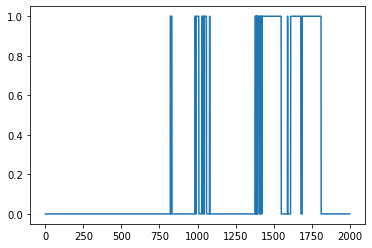

In [ ]:
plt.plot(MarketData.tp[20000:22000])

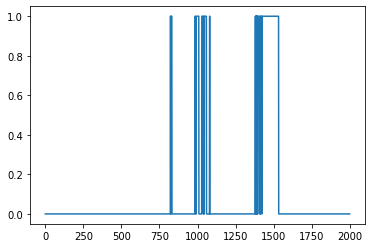

In [ ]:
plt.plot(tuningp[20000:22000])

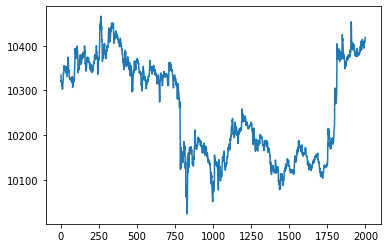

In [ ]:
plt.plot(MarketData.close[20000:22000])

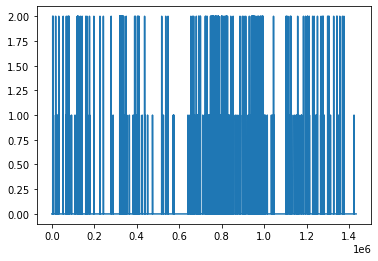

In [ ]:
def detect_turning_point(window:int, before_change_ratio:float, tp:list):
    tuning_points = []
    for i in range(window):
        tuning_points.append(0)
    for i in range(window, len(MarketData.close)):
        if tp[i] == 1:
            if (MarketData.close[i] - max(MarketData.close[i-window+1:i+1])) / MarketData.close[i] <= -before_change_ratio:
                tuning_points.append(1)
            else:
                tuning_points.append(0)
        elif tp[i] == 2:
            if (MarketData.close[i] - min(MarketData.close[i-window+1:i+1])) / MarketData.close[i] >= before_change_ratio:
                tuning_points.append(2)
            else:
                tuning_points.append(0)
        else:
            tuning_points.append(0)
    return tuning_points

tuningp = detect_turning_point(60, 0.025, MarketData.tp)
plt.plot(tuningp)

In [ ]:
df.to_csv('/content/drive/My Drive/various_period_test.csv')

In [ ]:
len(MarketData.tp)

1433167

In [ ]:
len(MarketData.close)

1433759